In [126]:
import warnings


import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted
from sklearn.pipeline import Pipeline, make_pipeline
from plotly.subplots import make_subplots

warnings.simplefilter(action="ignore", category=FutureWarning)

In [141]:
df = pd.read_csv("/Users/steve/Desktop/2023/Sorted_Ned.csv")

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        21 non-null     int64  
 1   FPI_Ned     21 non-null     float64
 2   ETX_Ned     21 non-null     float64
 3   BFC_Ned     21 non-null     float64
 4   FC_Ned      21 non-null     object 
 5   Ttrans_Ned  21 non-null     object 
 6   Loaded_Ned  21 non-null     object 
 7   EF_Ned      21 non-null     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.4+ KB


In [143]:
df.drop(columns=["Ttrans_Ned", "Loaded_Ned", "FC_Ned"], inplace=True)

In [144]:
#Recast column FC_Ned data type from object to float
#df["FC_Ned"] = (df["FC_Ned"].str.replace(",", "").astype(float))


In [145]:
df.to_csv("/Users/steve/Desktop/2023/Sorted_Ned_1.csv", index=False)

In [146]:
df.set_index("Year", inplace=True)
df.head(20)

,FPI_Ned,ETX_Ned,BFC_Ned,EF_Ned
Year,,,,
2001,83.475,10.41,190.677181,100.000000
2002,83.750,10.74,206.463802,100.000000
2003,83.200,10.08,161.217852,100.000000
2004,84.300,9.81,204.349889,71.592886
2005,87.100,9.28,253.823667,71.567010
2006,89.100,9.69,25.480000,70.713481
2007,91.100,10.08,333.746000,70.599739
2008,95.200,10.10,402.245000,72.853186
2009,94.200,9.98,331.139000,72.537247


In [107]:
#Use the describe method to print the summary statistics of the data
df[["FPI_Ned", "ETX_Ned", "BFC_Ned", "EF_Ned"]].describe()

,FPI_Ned,ETX_Ned,BFC_Ned,EF_Ned
count,21.000000,21.000000,21.000000,21.000000
mean,96.129762,9.283810,336.133161,76.531060
std,8.727355,1.189687,222.451168,9.862296
min,83.200000,7.150000,25.480000,70.599739
25%,89.100000,8.570000,204.349889,72.428476
50%,97.600000,9.700000,285.000000,72.780263
75%,100.500000,10.080000,402.245000,73.774185
max,111.400000,10.740000,826.163000,100.000000


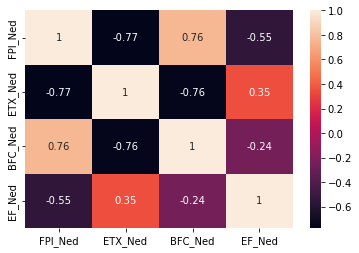

In [118]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()


In [108]:
import statsmodels.tsa.stattools as smt


# Run the ADF test on the data
result = smt.adfuller(df['FPI_Ned'])

# Extract the test statistic and critical values
test_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Print the results of the ADF test
print("Test Statistic: ", test_statistic)
print("p-value: ", p_value)
print("Critical Values:")
for key, value in critical_values.items():
    print(key, value)

# Check if the test statistic is below the critical values to determine if the series is stationary
if test_statistic < critical_values['5%']:
    print("The series is stationary.")
else:
    print("The series is non-stationary.")


Test Statistic:  0.2653885311664286
p-value:  0.9756996019478558
Critical Values:
1% -3.8092091249999998
5% -3.0216450000000004
10% -2.6507125
The series is non-stationary.


In [109]:
import statsmodels.tsa.stattools as smt


# Run the ADF test on the data
result = smt.adfuller(df['ETX_Ned'])

# Extract the test statistic and critical values
test_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Print the results of the ADF test
print("Test Statistic: ", test_statistic)
print("p-value: ", p_value)
print("Critical Values:")
for key, value in critical_values.items():
    print(key, value)

# Check if the test statistic is below the critical values to determine if the series is stationary
if test_statistic < critical_values['5%']:
    print("The series is stationary.")
else:
    print("The series is non-stationary.")

Test Statistic:  0.9399055385106098
p-value:  0.9935896193185181
Critical Values:
1% -4.137829282407408
5% -3.1549724074074077
10% -2.7144769444444443
The series is non-stationary.


In [110]:
import statsmodels.tsa.stattools as smt


# Run the ADF test on the data
result = smt.adfuller(df['BFC_Ned'])

# Extract the test statistic and critical values
test_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Print the results of the ADF test
print("Test Statistic: ", test_statistic)
print("p-value: ", p_value)
print("Critical Values:")
for key, value in critical_values.items():
    print(key, value)

# Check if the test statistic is below the critical values to determine if the series is stationary
if test_statistic < critical_values['5%']:
    print("The series is stationary.")
else:
    print("The series is non-stationary.")

Test Statistic:  1.5219152888031895
p-value:  0.9976033350404387
Critical Values:
1% -3.9644434814814815
5% -3.0849081481481484
10% -2.6818144444444445
The series is non-stationary.


In [111]:
import statsmodels.tsa.stattools as smt


# Run the ADF test on the data
result = smt.adfuller(df['EF_Ned'])

# Extract the test statistic and critical values
test_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Print the results of the ADF test
print("Test Statistic: ", test_statistic)
print("p-value: ", p_value)
print("Critical Values:")
for key, value in critical_values.items():
    print(key, value)

# Check if the test statistic is below the critical values to determine if the series is stationary
if test_statistic < critical_values['5%']:
    print("The series is stationary.")
else:
    print("The series is non-stationary.")

Test Statistic:  -2.807329293808403
p-value:  0.05723443350747432
Critical Values:
1% -4.137829282407408
5% -3.1549724074074077
10% -2.7144769444444443
The series is non-stationary.


In [112]:
import statsmodels.tsa.vector_ar.vecm as smt


# Run the Johansen test on the data
result = smt.coint_johansen(df, det_order=0, k_ar_diff=1)

# Extract the test statistics and critical values
eigenvalues = result.eig
critical_values = result.cvt[:,2]

# Print the results of the Johansen test
print("Eigenvalues: ", eigenvalues)
print("Critical Values:", critical_values)

# Check if the eigenvalues are greater than the critical values to determine if the series are cointegrated
number_of_cointegrated_series = 0
for i in range(len(eigenvalues)):
    if eigenvalues[i] > critical_values[i]:
        number_of_cointegrated_series = number_of_cointegrated_series + 1

if number_of_cointegrated_series > 0:
    print("The series are cointegrated.")
else:
    print("The series are not cointegrated.")


Eigenvalues:  [0.69270684 0.58764397 0.33353693 0.00538015]
Critical Values: [54.6815 35.4628 19.9349  6.6349]
The series are not cointegrated.


In [115]:
import statsmodels.api as sm
#Intantiate and fit VAR Model
df_1 = pd.DataFrame(df, columns=['FPI_Ned', 'ETX_Ned', 'BFC_Ned', 'EF_Ned'])

# Fit the VAR model
model = sm.tsa.VAR(df[['FPI_Ned', 'ETX_Ned', 'BFC_Ned', 'EF_Ned']])
result = model.fit()

# Check the summary of the model fit
print(result.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 06, Feb, 2023
Time:                     20:43:45
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    14.0191
Nobs:                     20.0000    HQIC:                   13.2177
Log likelihood:          -223.748    FPE:                    472900.
AIC:                      13.0233    Det(Omega_mle):         193700.
--------------------------------------------------------------------
Results for equation FPI_Ned
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             28.252892        11.463489            2.465           0.014
L1.FPI_Ned         0.863069         0.076559           11.273           0.000
L1.ETX_Ned        -0.831341         0.473212           -1.757         

/Users/steve/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [120]:
# Extract the coefficients
coefficients = result.coefs
print("Coefficients:")
for i, coef in enumerate(coefficients):
    print(f"Lag {i + 1}:")
    print(coef)

Coefficients:
Lag 1:
[[ 8.63068769e-01 -8.31340724e-01  6.24810998e-04 -8.06345017e-02]
 [-2.09667384e-02  8.03582905e-01 -8.83697842e-04 -9.55778192e-03]
 [ 7.97001090e+00 -7.26076177e+01  3.49752778e-01  2.28614480e+00]
 [ 1.11845405e-01  1.41707510e+00  3.54225514e-03  6.66134832e-01]]


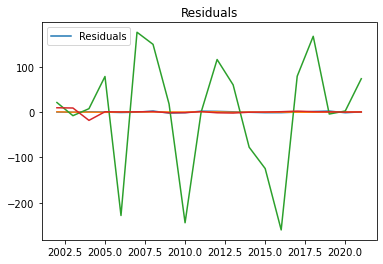

In [121]:
# Check the residuals
residuals = result.resid
plt.plot(residuals)
plt.title("Residuals")
plt.legend(['Residuals'])
plt.show()

In [124]:
mean_residuals = np.mean(residuals)
print(mean_residuals)

FPI_Ned   -2.984279e-14
ETX_Ned    7.549517e-15
BFC_Ned   -9.180212e-13
EF_Ned     2.344791e-14
dtype: float64


In [125]:
import scipy.stats as stats
_, p_value = stats.shapiro(residuals)
print(p_value)

6.495363735802354e-14


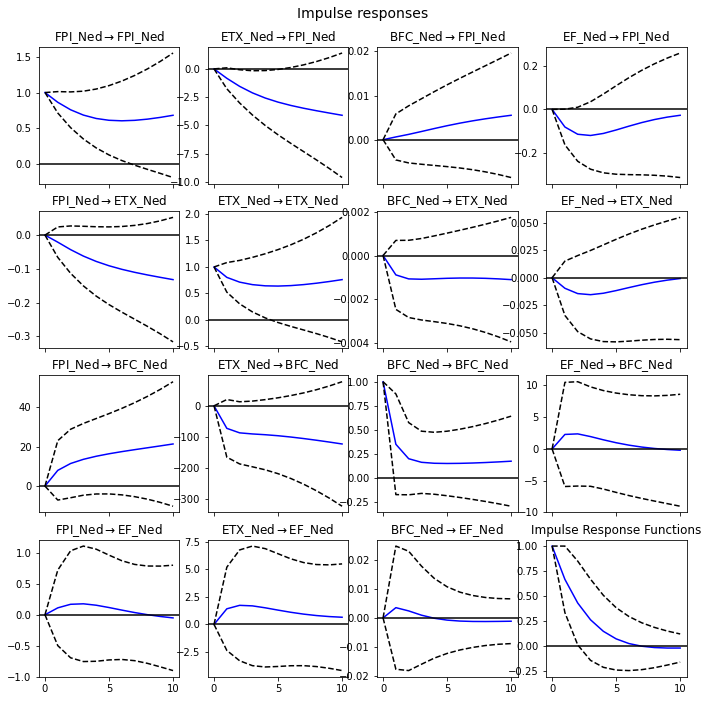

In [122]:
# Impulse Response Functions
irfs = result.irf(10)
irfs.plot(orth=False)
plt.title("Impulse Response Functions")
plt.show()

In [123]:
# Forecast
forecast = result.forecast(df[['FPI_Ned', 'ETX_Ned', 'BFC_Ned', 'EF_Ned']].values[-5:], 5)
print("Forecast:")
print(forecast)

Forecast:
[[ 113.09954752    6.68298297  803.89860666   73.14141429]
 [ 114.91430706    6.27958589  845.27642096   72.86348923]
 [ 116.86419342    5.88346416  902.86640377   72.45625299]
 [ 118.94521171    5.47726489  966.37972951   72.04572876]
 [ 121.15174984    5.05501505 1033.73407365   71.65438213]]
